# Introduction

This data consists of the sale of a particular retail shop. A retailer's worst nightmare is how to sell the costliest products of his shop and whom to sell them. We will explore the dataset and try to help the retailer in this project. We will try to help the retailer to an extent that he will be sure that a particular customer will buy one of the costly things in his shop.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
%matplotlib inline
mlp.style.use('ggplot')

In [2]:
bfri=pd.read_csv("BlackFriday.csv")

In [3]:
bfri.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Missing data

In [4]:
bfri.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

Product categories 2 and 3 have 166986 and 373299 missing data. There is nothing we can do about it  as dropping them would cause serious loss of data and we can not convert them to 0. So we'll just ignore them.

# Analysis

In [5]:
#1 Which customer gender do they handle most?
#2 Which customer gender buys costly things?
#3 Which age group of customers comes to this retailer the most and buys costlier things?
#4 In which city does his shop run the best?
#5 Which martial status of customers does he handle the most?
#6 Suppose a new product of a particular product type has been released. To how many of the trusted customers should he send an SMS have good amount of business?
#7 How many minimum number of years does the retailer take to attract a customer to buy costly things? 

In [6]:
bfri.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.001471,0.004045,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,0.001471,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.004045,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.005389,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000


Here we are getting all the categories which are integers. We have to convert other columns to integers like in age group 0-17 will have 1, 55+ will have some number and so on to get a correlation.

In [7]:
bfri["Gender"]=bfri['Gender'].astype('category')
bfri["Age"]=bfri['Age'].astype('category')
bfri["City_Category"]=bfri['City_Category'].astype('category')
bfri["Stay_In_Current_City_Years"]=bfri['Stay_In_Current_City_Years'].astype('category')

In [8]:
bfri['Gender_code']=bfri['Gender'].cat.codes+1
bfri['Age_code']=bfri['Age'].cat.codes+1
bfri['City_code']=bfri['City_Category'].cat.codes+1
bfri['Years_code']=bfri['Stay_In_Current_City_Years'].cat.codes+1
bfri

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_code,Age_code,City_code,Years_code
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,1,1,1,3
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,1,1,1,3
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,1,1,1,3
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,1,1,1,3
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,2,7,3,5
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227,2,3,1,4
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215,2,5,2,3
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854,2,5,2,3
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686,2,5,2,3
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871,2,3,1,2


In [9]:
bfri.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_code,Age_code,City_code,Years_code
User_ID,1.000000,-0.023024,0.018732,0.003687,0.001471,0.004045,0.005389,-0.031898,0.033359,0.024107,-0.030655
Occupation,-0.023024,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104,0.117294,0.091898,0.033781,0.031203
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129,-0.010379,0.312079,0.040173,-0.012663
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125,-0.045661,0.061951,-0.027444,-0.004182
Product_Category_2,0.001471,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973,-0.018440,0.054762,-0.012120,-0.001781
Product_Category_3,0.004045,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257,0.028403,0.057155,-0.002672,0.002039
Purchase,0.005389,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000,0.060086,0.017717,0.068507,0.005470
Gender_code,-0.031898,0.117294,-0.010379,-0.045661,-0.018440,0.028403,0.060086,1.000000,-0.004413,-0.004129,0.015392
Age_code,0.033359,0.091898,0.312079,0.061951,0.054762,0.057155,0.017717,-0.004413,1.000000,0.122308,-0.004754
City_code,0.024107,0.033781,0.040173,-0.027444,-0.012120,-0.002672,0.068507,-0.004129,0.122308,1.000000,0.019948


From this correlation we can see that purchase of that retail shop depends mostly on gender and the city where it resides. That means the retailer should be very careful in handling his customers of a particular gender. Also the retailer should be very careful in choosing his stock in a particular city. His purchases depend least on the martial status and the age of the customer.

In [10]:
#1 
bfri['Gender'].value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

Looks like they mostly handle male customers rather than female customers.

In [11]:
#2
bfri.groupby(['Gender'],as_index=False)['Purchase'].agg('sum')

,Gender,Purchase
0,F,1164624021
1,M,3853044357


Obviously, if the customers are mostly male, the total cose of items bought by males will be greater than females. But our moto is to find whether it is males or females who is ready to buy costlier items.

The way we are going to do this is first we will find out the average cost to get an idea how costly can a product be. Then we will set a limit and count the number of females and males that bought it. 

In [12]:
bfri['Purchase'].mean()

9333.859852635065

The average cost of each product is almost 9500. Let us say that the limit will be 20000.

In [13]:
bfri[bfri['Purchase']>=20000]['Gender'].value_counts()

M    9741
F    2780
Name: Gender, dtype: int64

So there are almost 9500 entries of males (greater than 3 times the number of females) who buy products greater than 20000. Definitely, males buy costlier products.

In [14]:
#3
bfri['Age'].value_counts().sort_values(ascending=False)

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

Generally, people of age group 26-35 come to this retailer very often, followed by groups of 36-45, 18-25, and so on. But let us find which age group buys costlier products from him. Let us limit the cost of the costly products from 20000.

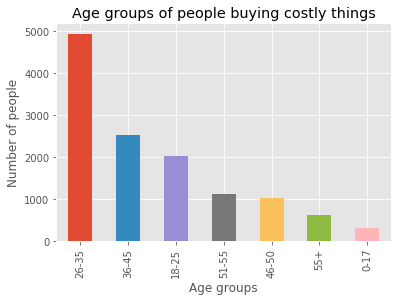

In [15]:
bfri[bfri['Purchase']>=20000]['Age'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Age groups of people buying costly things')
plt.ylabel("Number of people")
plt.xlabel("Age groups")
plt.show()

Looks like people of age group 26-35 years buy costlier things(almost double the number of people of age 35-45). That means the probability of his products(cost>20000) will be sold if a person of age group 26-35 walks in, will be much greater that people of age groups(35-45,18-25). It is advisable to the retailer that he should not get products (cost>20000) at display for people of age groups(55+,0-17) unless they ask for it(as it has the least probability of getting sold). 

In [16]:
#4
bfri['City_Category'].value_counts()

B    226493
C    166446
A    144638
Name: City_Category, dtype: int64

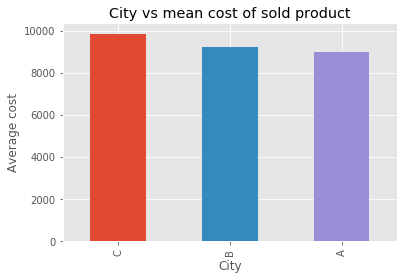

In [17]:
bfri.groupby('City_Category')['Purchase'].agg('mean').sort_values(ascending=False).plot(kind='bar')
plt.title('City vs mean cost of sold product')
plt.ylabel('Average cost')
plt.xlabel("City")
plt.show()

Looks like though city B has more number of sales but all the cities have almost equal average cost. Now let us find which city has more sale of products greater than 20000.

In [18]:
bfri[bfri['Purchase']>=20000]['City_Category'].value_counts()

B    4966
C    4328
A    3227
Name: City_Category, dtype: int64

It is very interesting to note that though city B has more number of sales, people of city C buy costly products as good as city B. So the retailer should increase the stock of costly products of City C first and then city B.

In [19]:
#5
bfri['Marital_Status'].value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

Looks like unmarried people come to him the most. Now let us find which of these(married or unmarried) buy costlier things.

In [20]:
bfri[bfri['Purchase']>=20000]['Marital_Status'].value_counts()

0    7325
1    5196
Name: Marital_Status, dtype: int64

The numbers are very close. Let us decrease the cost of the costly products. Let us make it 18000.

In [21]:
bfri[bfri['Purchase']>=18000]['Marital_Status'].value_counts()

0    25776
1    17651
Name: Marital_Status, dtype: int64

Now this is a reasonable number. Okay, looks like unmarried people buy costlier things more than married ones. So the retailer should increase the stock of those costly products(to a reasonable number) which are mostly bought by unmarried people.


In [22]:
#6
print(bfri['Product_Category_1'].unique())
print(bfri['Product_Category_2'].unique())
print(bfri['Product_Category_3'].unique())

[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]
[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


Let us assume that a new product of the type of the categories 12,14,17 has been newly launched. Let us find to how many customers should he send an SMS to get a good profit.

In [23]:
bfri[(bfri['Product_Category_1']==12)&(bfri['Product_Category_2']==14)].drop_duplicates(subset='User_ID',keep='last')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_code,Age_code,City_code,Years_code
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,1,1,1,3
586,1000114,P00176842,F,26-35,2,C,0,0,12,14.0,NaN,1735,1,3,3,1
1692,1000271,P00083942,M,18-25,4,C,1,0,12,14.0,NaN,1719,2,2,3,2
2024,1000323,P00085442,M,46-50,12,C,1,0,12,14.0,NaN,1714,2,5,3,2
2578,1000412,P00101742,M,36-45,15,A,1,1,12,14.0,NaN,1392,2,4,1,2
2610,1000419,P00083942,M,18-25,3,C,1,0,12,14.0,NaN,1413,2,2,3,2
5871,1000953,P00101742,M,51-55,20,B,1,1,12,14.0,NaN,1734,2,6,2,2
6677,1001071,P00101742,M,51-55,16,C,0,0,12,14.0,NaN,1742,2,6,3,1
7027,1001117,P00176842,M,18-25,14,B,3,0,12,14.0,NaN,1385,2,2,2,4
7746,1001202,P00176842,M,36-45,12,B,0,0,12,14.0,NaN,1426,2,4,2,1


There are 1117 users who should be notified about the new product. The user IDs are also shown. 

In [28]:
#7
bfri[bfri['Purchase']>=20000].groupby(['Stay_In_Current_City_Years','City_Category'],as_index=False)['Purchase'].agg('count').sort_values('Purchase',ascending=False)

,Stay_In_Current_City_Years,City_Category,Purchase
4,1,B,1888
5,1,C,1530
3,1,A,1067
10,3,B,911
8,2,C,811
7,2,B,800
13,4+,B,800
14,4+,C,758
11,3,C,677
0,0,A,608


Looks like the retailer can attract people to his shop to buy costly things in 1 year.

# One Last Analysis

Now let us consider that a person is entering his shop. How should he understand that if he displays the costly things it will get sold?

In [30]:
bfri[bfri['Purchase']>=20000].groupby(['Gender','Age','Stay_In_Current_City_Years','Marital_Status'],as_index=False)['Purchase'].agg('count').sort_values('Purchase',ascending=False).head(10)

,Gender,Age,Stay_In_Current_City_Years,Marital_Status,Purchase
92,M,26-35,1,0,764.0
93,M,26-35,1,1,538.0
96,M,26-35,3,0,465.0
98,M,26-35,4+,0,459.0
82,M,18-25,1,0,427.0
102,M,36-45,1,0,424.0
94,M,26-35,2,0,418.0
90,M,26-35,0,0,373.0
123,M,51-55,1,1,305.0
95,M,26-35,2,1,291.0


On looking at the above chart we get to see that the probability of a costly item getting sold will be highest for a person who is an unmarried male of age group 26-35 years and who has been staying in the currernt city for a year, followed by married male of 26-35 years, and so on.

# Conclusion

Thus from this data we got to learn many things about the past history of the retail shop and also predicted many things. A retailers worst nightmare is to determine if the costliest products in his shop will get sold or not, and if sold, which kind of people will buy them. We tried to help the retailer about which type of customer will buy those products,thus, saving some of the retailer's effort. From our analysis we got to know that unmarried males of age group 26-35 years currently staying in the city for more than a year, buy most of the costly things. Thus he should increase his stock of those particular costly things(to a reasonable extent) without being afraid about his sale as those products are sure to get sold.

# Thank You